In [1]:
import matplotlib.pyplot as plt
from AaltoAtoms import CircCorralData, CircCorral
from AMRL import Createc_Controller
from AMRL.Environment.get_atom_coordinate import pixel_to_nm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import ipywidgets as wdg

succeed to connect
	17 centroids


<IPython.core.display.Javascript object>


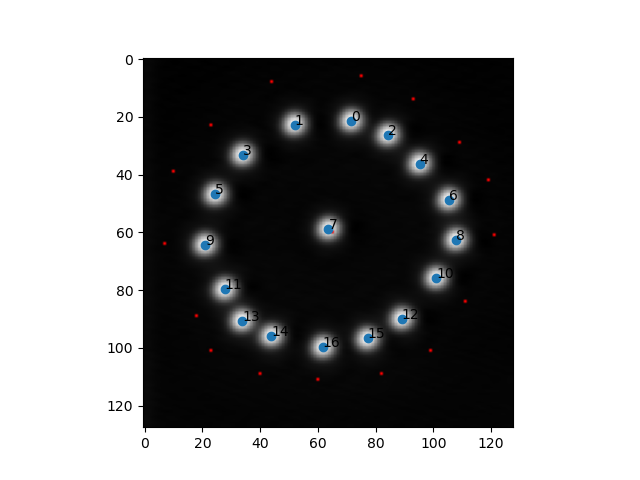

Textarea(value='[]', description='points:')

In [54]:
%matplotlib notebook

CC = Createc_Controller()

# f = r"Y:\labdata\Createc\STMDATA\Ag(111)\2022-03 Co Kondo corrals\04-04\A220405.101017.dat"
# C = CircCorralData(f, "label")
# C.occupied = True
# C.corral = True
# C.get_region_centroids()
# 

Cim = np.array(CC.stm.scandata(1,4))
zconst = float(CC.stm.getparam('ZPiezoConst'))
nmx = nmy = CC.get_len_nm()
C = CircCorral(Cim, zconst, nmx, nmy)
C.subtract_plane()
C.get_region_centroids(percentile=95, edge_cutoff=0.1, show=False)

# scale numbers between 0 and 1
im = MinMaxScaler().fit_transform(Cim.flatten().reshape(-1, 1)).reshape(Cim.shape)

# the image has to have 3 channels
# in this case we will just repeat the same channel 3 times
dispmat = np.stack([im,im,im], axis=-1)

fig = plt.figure()
plt.imshow(dispmat)

# show the atom positions
plt.scatter(*np.array(C.centroids).T)

# give numbers to the atom positions
for n, c in enumerate(C.centroids):
    plt.text(*c,'%d' %(n))

# List for selected pixels
selected = []

# Create a text area for displaying the selected pixels
text_area = wdg.Textarea(
    value = str(selected),
    description = "points:",
    disabled = False
)
display(text_area)

# Function to run when a pixel is clicked
def onclick(event):
    ''' Add the clicked pixel to the list of selected pixels and
    display it as red in the image.
    '''
    global selected
    x = int(event.xdata+0.5)
    y = int(event.ydata+0.5)
    if (y, x) in selected:
        im[y,x] = C.im[y,x]
        dispmat[y,x,:] = [im[y,x], im[y,x], im[y,x]]
        selected.remove((y, x))
    else:
        dispmat[y,x,:] = [1,0,0]
        selected += [(y, x)]
    text_area.value = str(selected)  # str(dir(event))
    print(selected)
    plt.imshow(dispmat)
    fig.canvas.draw()

ka = fig.canvas.mpl_connect('button_press_event', onclick)

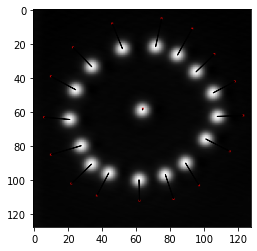

In [3]:
%matplotlib inline
assert(len(selected)==len(C.centroids))
for n, c in enumerate(C.centroids):
    plt.arrow(*c, *(np.array(list(reversed(selected[n])))-np.array(c)))
plt.imshow(dispmat);
plt.show()
#

In [36]:
offset_nm = CC.get_xy_nm()
len_nm = CC.get_len_nm()

In [5]:
selected1 = selected 
centroids = C.centroids

In [38]:
len_nm

14.00146484375

[107.69811320754717, 62.528301886792455] [123, 62]


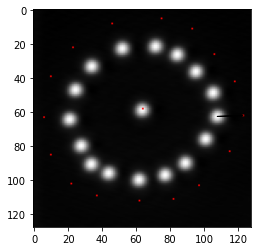

108 63 123 62


In [52]:
n = 8
print(centroids[n], list(reversed(selected1[n])))
initial = pixel_to_nm(centroids[n], dispmat, offset_nm, [len_nm, len_nm])
final = pixel_to_nm(np.array(list(reversed(selected1[n]))), dispmat[:,:,0], offset_nm, [len_nm, len_nm])
plt.imshow(dispmat);
plt.arrow(*centroids[n], *(np.array(list(reversed(selected[n])))-np.array(centroids[n])))
plt.show()
latmandata = CC.lat_manipulation(*initial, *final, 500, 6000, offset_nm, nmx)

In [44]:
help(latmandata)

Help on latmandata in module AMRL.Environment.createc_control object:

class latmandata(builtins.tuple)
 |  latmandata(time, x, y, current, dI_dV, topography)
 |  
 |  latmandata(time, x, y, current, dI_dV, topography)
 |  
 |  Method resolution order:
 |      latmandata
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new dict which maps field names to their values.
 |  
 |  _replace(self, /, **kwds)
 |      Return a new latmandata object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable) from builtins.type
 |      Make a new latmandata object from a sequence or iterable
 |  
 |  ----------------------------------------

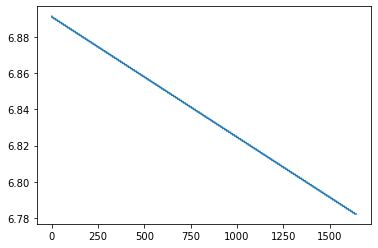

In [53]:
plt.plot(latmandata.y)

In [48]:

CC.nm_to_pixel(latmandata.x)

TypeError: nm_to_pixel() missing 5 required positional arguments: 'y_start_nm', 'x_end_nm', 'y_end_nm', 'offset_nm', and 'len_nm'

In [34]:
offset_nm

array([108.85148048, -38.85225868])

In [35]:
np.array(selected1)[0]

array([11, 73])